Student Performance Analysis --- Asad Mujeeb

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/student-data-analysis/StudentsPerformance.csv")

In [3]:
df.head(6)

,gender,lunch,parental level of education,race/ethnicity,test preparation course,math score,reading score,writing score
0,female,standard,bachelor's degree,group B,none,72,72,74
1,female,standard,some college,group C,completed,69,90,88
2,female,standard,master's degree,group B,none,90,95,93
3,male,free/reduced,associate's degree,group A,none,47,57,44
4,male,standard,some college,group C,none,76,78,75
5,female,standard,associate's degree,group B,none,71,83,78


In [4]:
df.shape

(1000, 8)

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.isnull().sum()

gender                         0
lunch                          0
parental level of education    0
race/ethnicity                 0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.columns

Index(['gender', 'lunch', 'parental level of education', 'race/ethnicity',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
# Visualization


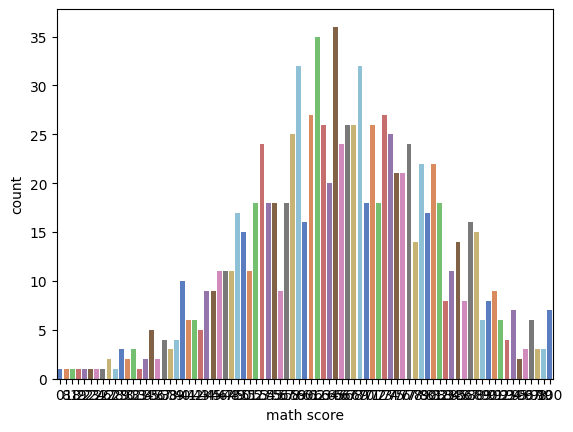

In [10]:
p = sns.countplot(x = "math score", data = df, palette = "muted")

In [11]:
passmarks = 40

In [14]:
df["Math_pass_status"] = np.where(df["math score"] < passmarks, "F", "P")
df.Math_pass_status.value_counts()

Math_pass_status
P    960
F     40
Name: count, dtype: int64

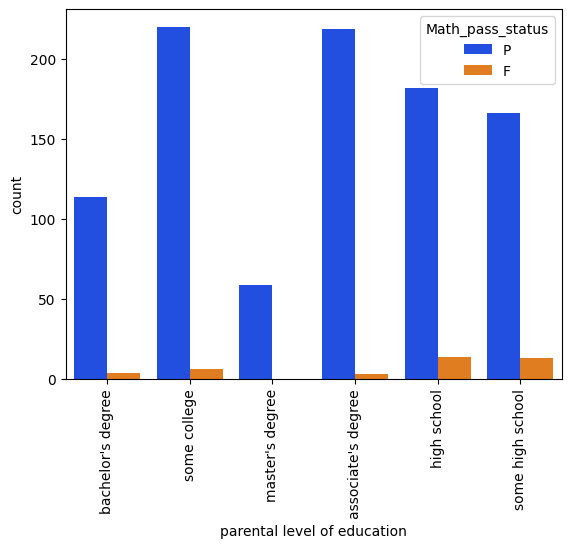

In [19]:
p = sns.countplot(x = "parental level of education", data = df, hue = "Math_pass_status",
                  palette = "bright")
_ = plt.setp(p.get_xticklabels(), rotation = 90)

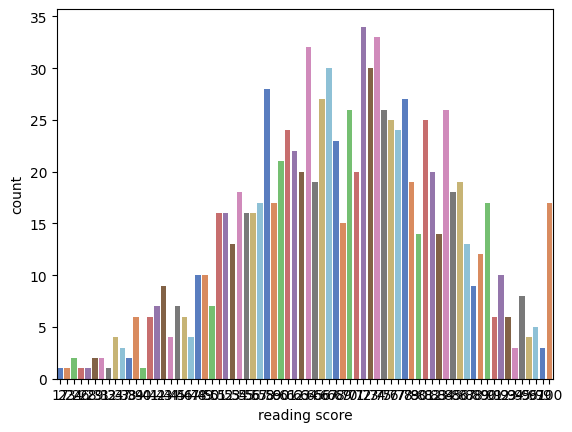

In [21]:
sns.countplot(x = "reading score", data = df, palette = "muted")
plt.show()

In [22]:
df["reading_pass_status"] = np.where(df["reading score"] < passmarks, "F", "P")
df.reading_pass_status.value_counts()

reading_pass_status
P    974
F     26
Name: count, dtype: int64

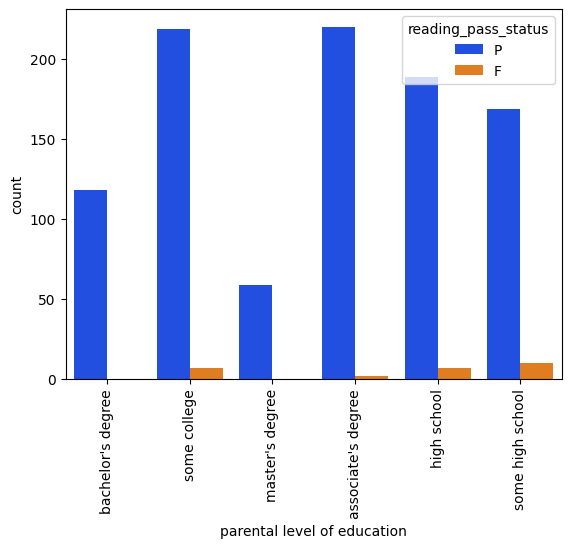

In [24]:
p = sns.countplot(x = "parental level of education", data = df ,hue = "reading_pass_status",
                  palette = "bright" )
_ = plt.setp(p.get_xticklabels(), rotation = 90)

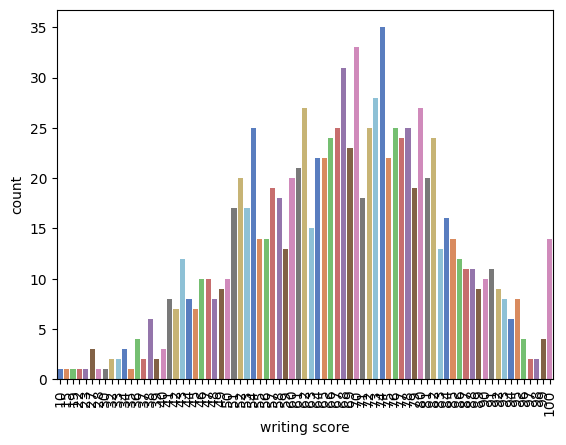

In [25]:
p = sns.countplot(x = "writing score", data = df, palette = "muted")
_ = plt.setp(p.get_xticklabels(), rotation = 90)

In [26]:
df["writing_pass_status"] = np.where(df["writing score"] < passmarks ,"F","P")
df.writing_pass_status.value_counts()

writing_pass_status
P    968
F     32
Name: count, dtype: int64

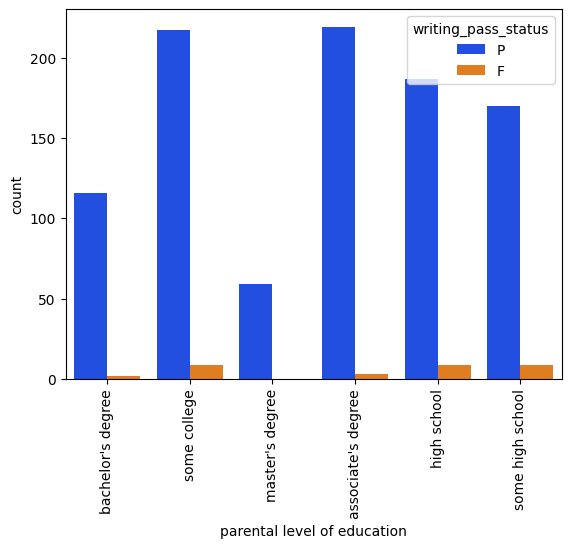

In [27]:
p = sns.countplot(x = "parental level of education", data = df, hue = "writing_pass_status",
                  palette = "bright")
_ = plt.setp(p.get_xticklabels(), rotation = 90)

In [29]:
df["overall_pass_status"] = df.apply(lambda x : "F" if x["Math_pass_status"] == "F" or
                                    x["reading_pass_status"] == "F" or
                                    x["writing_pass_status"] == "F" 
                                    else "P", axis = 1)
df.overall_pass_status.value_counts()

overall_pass_status
P    949
F     51
Name: count, dtype: int64

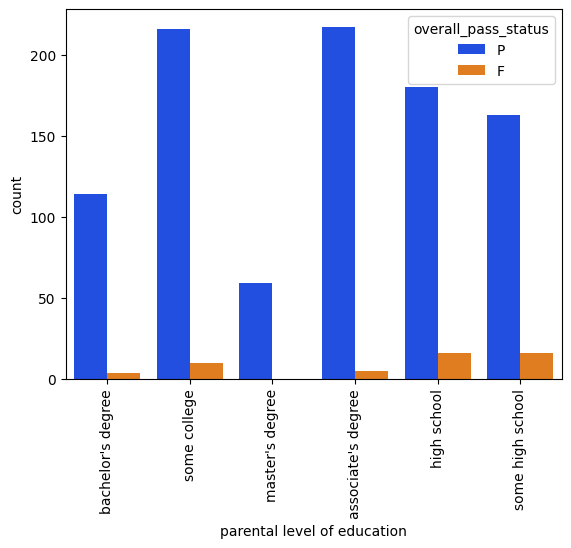

In [31]:
 p = sns.countplot(x = "parental level of education", data = df, hue = "overall_pass_status",
                  palette = "bright")
_ = plt.setp(p.get_xticklabels(), rotation = 90)

In [32]:
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]
df["percentage"] = df["total score"] / 3 

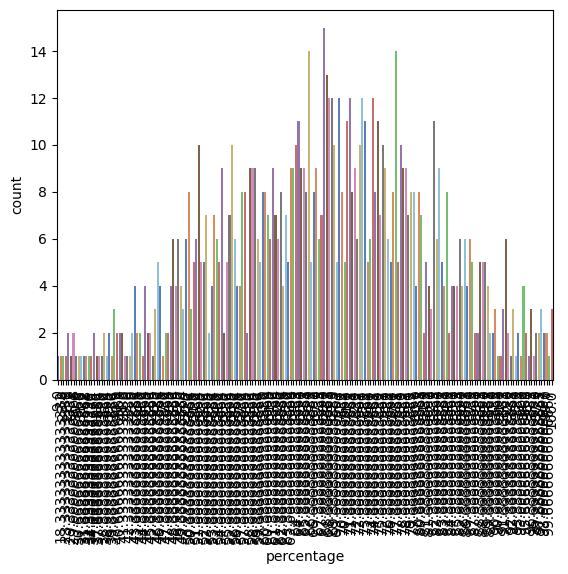

In [33]:
p = sns.countplot(x = "percentage", data = df, palette = "muted")
_ = plt.setp(p.get_xticklabels(), rotation = 90)

In [37]:
def getgrade( percentage, overall_pass_status):
    if (overall_pass_status == "F"):
        return "F"
    if (percentage >= 80):
        return "A"
    if (percentage >= 70):
        return "B"
    if (percentage >= 60):
        return "C"
    if (percentage >= 50):
        return "D"
    if (percentage >= 40):
        return "E"
    else:
        return "F"
df["Grade"] = df.apply(lambda x : getgrade(x["percentage"], x["overall_pass_status"]), axis = 1)
df.Grade.value_counts()

Grade
B    261
C    256
A    198
D    178
E     56
F     51
Name: count, dtype: int64

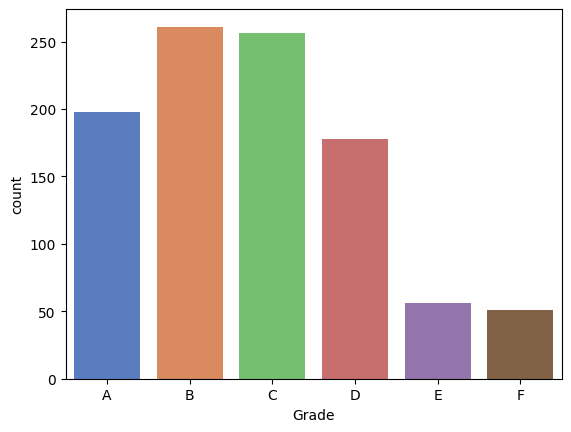

In [38]:
sns.countplot(x = "Grade", data = df, order = ["A","B","C","D","E","F"], palette = "muted")
plt.show()

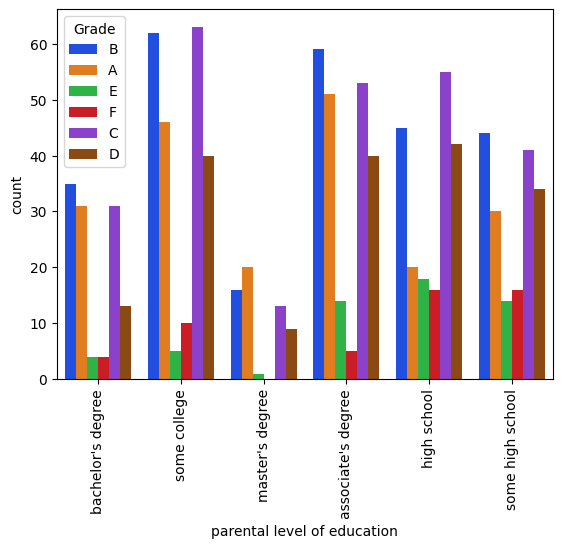

In [40]:
p = sns.countplot(x = "parental level of education", data = df, hue = "Grade", palette = "bright")
_ = plt.setp(p.get_xticklabels(), rotation = 90)

Thank you 